In [230]:
import numpy as np
import pandas as pd
data = pd.read_csv("WC_2gb.csv")
data

,executor_instances,executor_memory,executor_cores,driver_memory,driver_cores,scheduler_mode,collectat,reducebykey,total
0,10,12,6,10,4,FAIR,8,56,64
1,12,12,6,10,4,FAIR,8,55,63
2,14,12,6,10,4,FAIR,8,54,62
3,16,12,6,10,4,FAIR,8,52,60
4,18,12,6,10,4,FAIR,8,58,66
5,16,16,6,10,4,FAIR,9,64,73
6,16,10,6,12,4,FAIR,9,70,79
7,16,12,6,14,6,FAIR,8,54,62
8,16,12,6,16,6,FAIR,10,60,70
9,16,12,6,14,8,FAIR,10,58,68


In [231]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
schedulermode_encoded=le.fit_transform(data['scheduler_mode'].values)
schedulermode_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [232]:
x = np.array(list(zip(data['executor_instances'],data['executor_memory'],data['executor_cores'],data['driver_memory'],data['driver_cores'],schedulermode_encoded)))
x

array([[10, 12,  6, 10,  4,  0],
       [12, 12,  6, 10,  4,  0],
       [14, 12,  6, 10,  4,  0],
       [16, 12,  6, 10,  4,  0],
       [18, 12,  6, 10,  4,  0],
       [16, 16,  6, 10,  4,  0],
       [16, 10,  6, 12,  4,  0],
       [16, 12,  6, 14,  6,  0],
       [16, 12,  6, 16,  6,  0],
       [16, 12,  6, 14,  8,  0],
       [16, 12,  6, 20,  8,  0],
       [15, 25,  8, 20,  6,  0],
       [10, 12,  6, 10,  4,  1],
       [12, 12,  6, 10,  4,  1],
       [14, 12,  6, 10,  4,  1],
       [16, 12,  6, 10,  4,  1],
       [18, 12,  6, 10,  4,  1],
       [16, 16,  6, 10,  4,  1],
       [16, 10,  6, 12,  4,  1],
       [16, 12,  6, 14,  6,  1],
       [16, 12,  6, 16,  6,  1],
       [16, 12,  6, 14,  8,  1],
       [16, 12,  6, 20,  8,  1],
       [15, 25,  8, 20,  6,  1],
       [20, 12,  6, 20,  6,  1],
       [20, 12,  6, 20,  6,  0],
       [20, 12,  6, 10,  6,  1],
       [20, 12,  6, 10,  6,  0],
       [20, 16,  6, 20,  6,  1],
       [20, 16,  6, 20,  6,  0],
       [20

In [233]:
y = data.iloc[:,-2].values
y

array([56, 55, 54, 52, 58, 64, 70, 54, 60, 58, 60, 60, 57, 54, 57, 54, 54,
       60, 54, 55, 59, 72, 60, 60, 60, 60, 66, 55, 78, 44, 60, 60, 54, 51,
       59, 66, 57, 59, 59, 57, 46, 66, 68, 52, 53, 52, 70, 52, 52, 51, 76,
       55, 56, 57, 58, 73], dtype=int64)

In [234]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2)

In [235]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [236]:
Y_Pred = regressor.predict(X_Test)

In [237]:
Y_Pred

array([59.35255621, 59.41110302, 58.14707467, 58.41772674, 59.32442131,
       62.13797539, 56.63896821, 54.06089963, 55.02366503, 62.02804773,
       56.34709759, 59.07396995])

In [238]:
Y_Test

array([54, 54, 52, 53, 59, 59, 73, 58, 59, 60, 55, 60], dtype=int64)

In [239]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 36.73471804985229


In [240]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf.fit(X_Train,Y_Train)

RandomForestRegressor()

In [241]:
Y_Pred = rf.predict(X_Test)

In [242]:
print(np.round_(Y_Pred))

[56. 57. 52. 52. 60. 60. 61. 57. 56. 67. 56. 60.]


In [243]:
print(Y_Test)

[54 54 52 53 59 59 73 58 59 60 55 60]


In [251]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 18.961924999999997


In [256]:
pred1=rf.predict([[3,2,3,2,2,0]])
print(np.round(pred1))
pred2 = regressor.predict([[20,12,8,16,6,0]])
print(np.round(pred2))

[69.]
[56.]


Text(0.5, 0, 'Feature Importance')

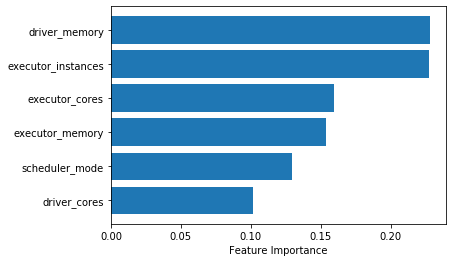

In [246]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])

import matplotlib.pyplot as plt
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [247]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])


feature_importances_df = pd.DataFrame(
    {"feature":list(df.columns),"importance":rf.feature_importances_}
).sort_values("importance",ascending=False)

feature_importances_df

,feature,importance
3,driver_memory,0.227999
0,executor_instances,0.227545
2,executor_cores,0.159547
1,executor_memory,0.154088
5,scheduler_mode,0.129151
4,driver_cores,0.101671
